In [1]:
import sys
sys.path.append("../vis/python")
from athena_read import vtk

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob

phimin = np.inf
phimax = -np.inf
for f in glob.glob('grav.block*.out1.00000.vtk'):
    r, th, phi, d = vtk(f)
    phimin = min(np.amin(d['phi'][d['phi']!=0]),phimin)
    phimax = max(np.amax(d['phi'][d['phi']!=0]),phimax)

def plot_phi_slice(phi_slice, n_ghost=2, vmin=phimin, vmax=phimax, **kwargs):
    for f in glob.glob('grav.block*.out1.00000.vtk'):
        r, th, phi, d = vtk(f)
        xf, zf = np.outer(np.sin(th), r), np.outer(np.cos(th), r)
        if (phi_slice>=phi[n_ghost]) and (phi_slice<=phi[-n_ghost]):
            iphi = np.argmin(np.abs(phi_slice-phi))
            plt.pcolormesh(xf, zf, d['phi'][iphi], vmin=vmin, vmax=vmax, **kwargs)
        if ((phi_slice+np.pi)>=phi[n_ghost]) and ((phi_slice+np.pi)<=phi[-n_ghost]):
            iphi = np.argmin(np.abs(phi_slice+np.pi-phi))
            plt.pcolormesh(-xf, zf, d['phi'][iphi], vmin=vmin, vmax=vmax, **kwargs)
    plt.gca().set_aspect('equal','box')
    return

In [3]:
x0, y0, z0 = 0.6, 0.8, 0.1 # copy from input file

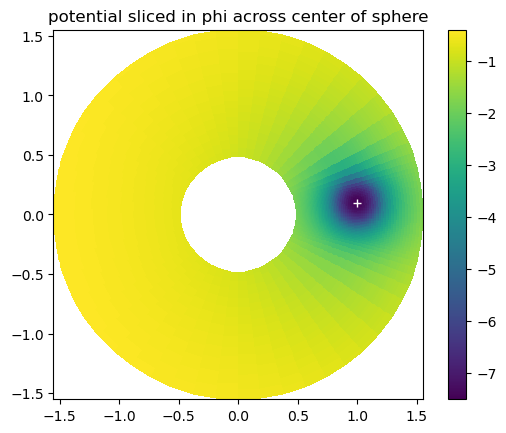

In [4]:
plot_phi_slice(np.arctan2(y0,x0), vmin=phimin, vmax=phimax)
plt.plot(np.sqrt(x0**2+y0**2),z0,'w+')
plt.title('potential sliced in phi across center of sphere')
plt.colorbar()

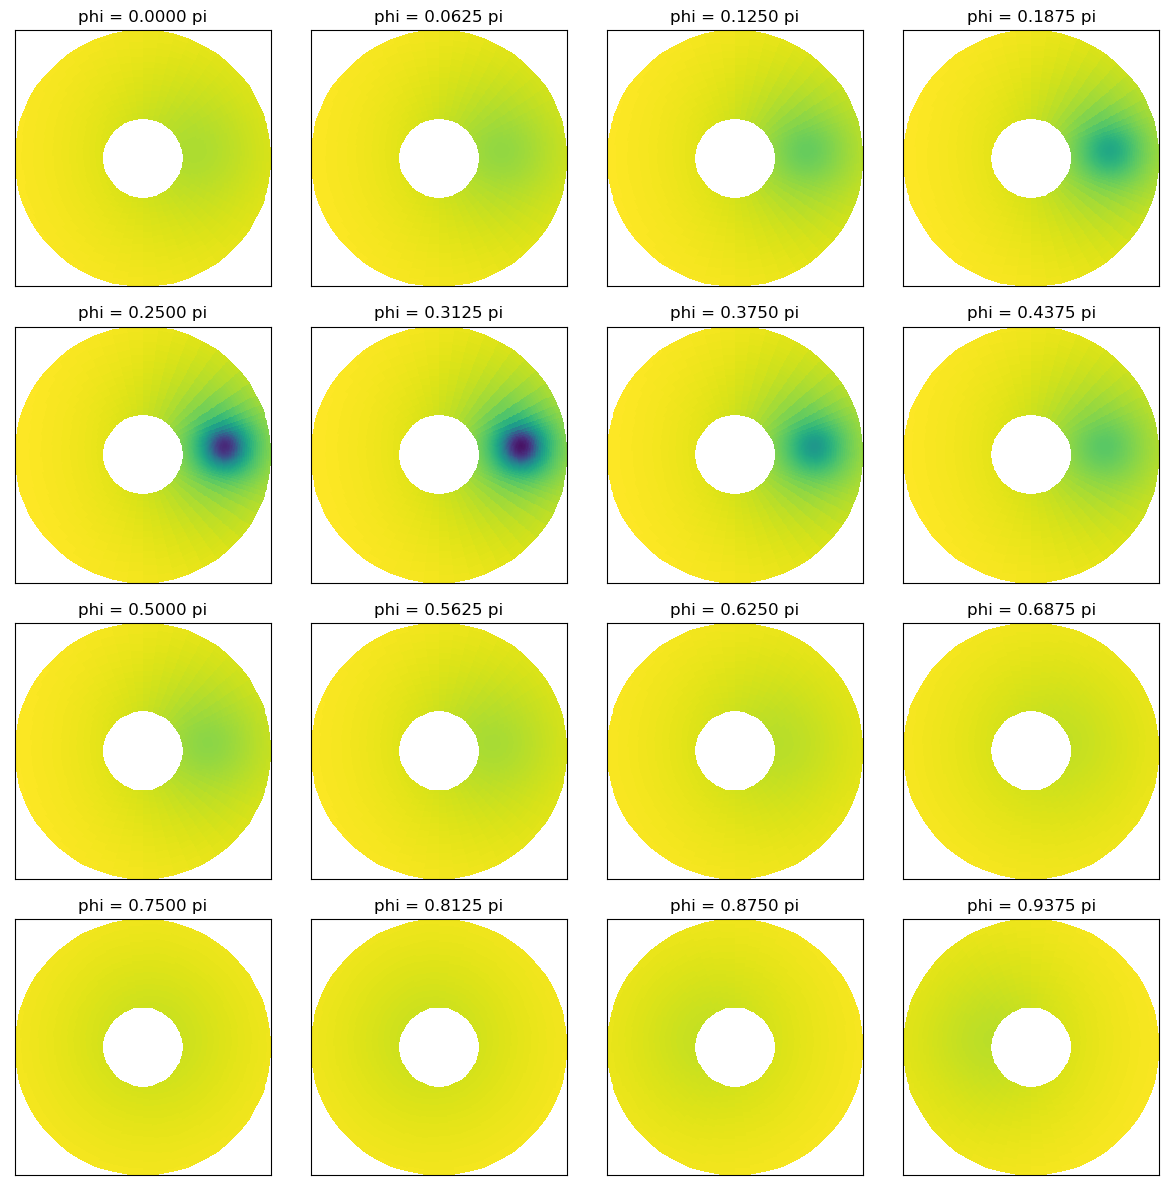

In [5]:
fig, ax = plt.subplots(4,4,figsize=(12,12))
ax = ax.flatten()
for phi_slice, ax1 in zip(np.linspace(0,1,17)[:-1] * np.pi, ax):
    plt.sca(ax1)
    plot_phi_slice(phi_slice, vmin=phimin, vmax=phimax)
    plt.xticks([])
    plt.yticks([])
    plt.title('phi = {:.4f} pi'.format(phi_slice/np.pi))
plt.tight_layout()